In [89]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tensorflow Version 2.11.1


In [90]:
df=pd.read_csv('training.1600000.processed.noemoticon.csv',nrows=1000000, encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [91]:
df.describe

<bound method NDFrame.describe of         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...    ..         ...                           ...       ...   
999995  4  1879942922  Thu May 21 23:36:20 PDT 2009  NO_QUERY   
999996  4  1879942975  Thu May 21 23:36:21 PDT 2009  NO_QUERY   
999997  4  1879943113  Thu May 21 23:36:22 PDT 2009  NO_QUERY   
999998  4  1879943219  Thu May 21 23:36:24 PDT 2009  NO_QUERY   
999999  4  1879943230  Thu May 21 23:36:24 PDT 2009  NO_QUERY   

        _TheSpecialOne_  \
0         scotthamilton   
1              mattycus   
2               ElleCTF   
3                Karoli   
4              joy_wolf   
...                 ...

In [92]:
df.dtypes

0                                                                                                                       int64
1467810369                                                                                                              int64
Mon Apr 06 22:19:45 PDT 2009                                                                                           object
NO_QUERY                                                                                                               object
_TheSpecialOne_                                                                                                        object
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    object
dtype: object

In [93]:
df.isnull().sum()

0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64

In [94]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [95]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [96]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


Text(0.5, 1.0, 'Sentiment Data Distribution')

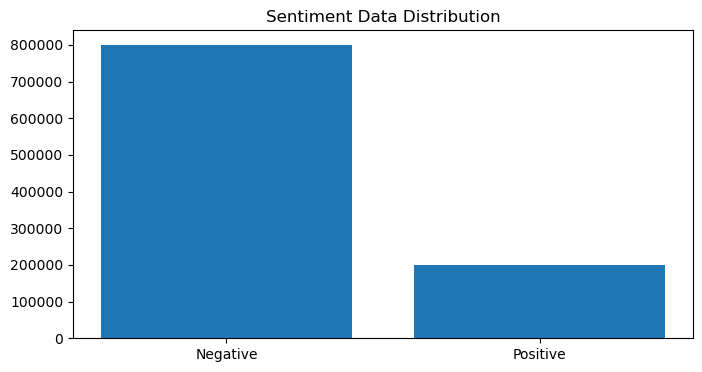

In [97]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [11]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,text
647489,Negative,i dunno who to say for follow friday
581320,Negative,@NewNicci .....True fact. I've neva done it......
374178,Negative,I can't fall asleep.
355377,Negative,@IVFGirl bummed for you. hope you gallstones ...
516063,Negative,the first day of classes wasn't really that bo...
197944,Negative,@serenetan Sorry I ate your dinner for you alr...
556668,Negative,exhausted...
735856,Negative,I completely hate it when i fall sick when am ...
626925,Negative,Tenderloin red pots cabbage and mac! Wish my b...
354666,Negative,@likeaboss


In [98]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [99]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [100]:
df.text = df.text.apply(lambda x: preprocess(x))

In [20]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [101]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 800000
Test Data size 200000


In [21]:
train_data.head(10)

,sentiment,text
648911,Negative,oohhh suck junk ps shall get goul tomorrow fai...
402969,Negative,damn early tomorrow
327515,Negative,yup something cell phone
913774,Positive,cool scene end ties another comic book movie
875277,Positive,teenage mutant ninja turtles national treasure...
870004,Positive,hahahaha nice shot
156602,Negative,know suck
429980,Negative,andddd back track ankle hurts
309794,Negative,10 minutes left
986688,Positive,tnx follow hehehehe


In [102]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)



Vocabulary Size : 201592


In [62]:
from keras.utils import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (800000, 30)
Testing X Shape: (200000, 30)


In [63]:
labels = train_data.sentiment.unique().tolist()

In [64]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (800000, 1)
y_test shape: (200000, 1)


In [103]:
x_train

566853                        boston new year season ticket
382311              aw sucks im melbourne ruby rose awesome
241519                                              restart
719220    watching gsn mimi wishing looking new houses r...
905718                                  gonna beautiful day
                                ...                        
259178                                           link wrong
365838                         first week exams one half go
131932    know sometimes pretend superpower like say som...
671155                              cant believe came asked
121958                                            back bali
Name: text, Length: 800000, dtype: object

In [87]:
x_test

987231    thank 2 everyone cjyc absolute whopper time th...
79954                    tired maybe relaxation near future
567130    beer ordered trivia night state 24oz less chip...
500891    need cheese facsettiiii sooo procrastinating s...
55399       everything still hurts need fall asleep already
                                ...                        
90245               school tomorrow dont wanna see teachers
639296    wow hate life used eardrops fix left ear right...
311939              crier omg know crap probably go see day
324459    im watching vh1 last days lisa quot left eye q...
390499    looks like messed sims 3 used wrong card preor...
Name: text, Length: 200000, dtype: object

In [86]:
y_test

987231    Positive
79954     Negative
567130    Negative
500891    Negative
55399     Negative
            ...   
90245     Negative
639296    Negative
311939    Negative
324459    Negative
390499    Negative
Name: sentiment, Length: 200000, dtype: object

In [85]:
y_train

566853    Negative
382311    Negative
241519    Negative
719220    Negative
905718    Positive
            ...   
259178    Negative
365838    Negative
131932    Negative
671155    Negative
121958    Negative
Name: sentiment, Length: 800000, dtype: object

In [84]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [57]:
x_train

566853                        boston new year season ticket
382311              aw sucks im melbourne ruby rose awesome
241519                                              restart
719220    watching gsn mimi wishing looking new houses r...
905718                                  gonna beautiful day
                                ...                        
259178                                           link wrong
365838                         first week exams one half go
131932    know sometimes pretend superpower like say som...
671155                              cant believe came asked
121958                                            back bali
Name: text, Length: 800000, dtype: object

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)


In [ ]:
y_pred = model.predict(x_test)
y_pred
